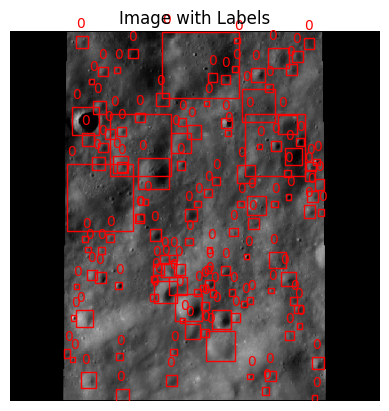

In [3]:
import cv2
import random
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def parse_labels_from_file(file_path):
    labels = []
    with open(file_path, 'r') as file:
        for line in file:
            label_parts = line.strip().split()
            if len(label_parts) == 5:
                class_id, x, y, w, h = map(float, label_parts)
                labels.append((int(class_id), x, y, w, h))
    return labels

def yolo_to_pixels(image_width, image_height, box):
    x, y, w, h = box
    xmin = int((x - w / 2) * image_width)
    xmax = int((x + w / 2) * image_width)
    ymin = int((y - h / 2) * image_height)
    ymax = int((y + h / 2) * image_height)
    return xmin, ymin, xmax, ymax

def display_image_with_labels(image_path, labels):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_height, image_width, _ = image.shape    
    fig, ax = plt.subplots(1)
    ax.imshow(image_rgb)

    for label in labels:
        class_id, x, y, w, h = label
     
        xmin, ymin, xmax, ymax = yolo_to_pixels(image_width, image_height, (x, y, w, h))

        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')

        ax.add_patch(rect)

        ax.text(xmin, ymin - 10, f'{class_id}', fontsize=10, color='r')

    plt.title('Image with Labels')

    plt.axis('off')
    plt.show()


for j in range(1):
    img_path = 'C:\\Users\\rudra\\Downloads\\LU3M6TGT_yolo_format\\train\\images\\'
    random_img = random.choice(os.listdir(img_path))

    final_path_img = img_path + random_img

    labels_file_path = 'C:\\Users\\rudra\\Downloads\\LU3M6TGT_yolo_format\\train\\labels\\' + random_img.rsplit('.', 1)[0] + '.txt'
    labels = parse_labels_from_file(labels_file_path)

    display_image_with_labels(final_path_img, labels)

In [11]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [4]:
import cv2
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import tkinter as tk
from tkinter import filedialog, messagebox
from PIL import Image, ImageTk

def parse_labels_from_file(file_path):
    labels = []
    with open(file_path, 'r') as file:
        for line in file:
            label_parts = line.strip().split()
            if len(label_parts) == 5:
                class_id, x, y, w, h = map(float, label_parts)
                labels.append((int(class_id), x, y, w, h))
    return labels

def yolo_to_pixels(image_width, image_height, box):
    x, y, w, h = box
    xmin = int((x - w / 2) * image_width)
    xmax = int((x + w / 2) * image_width)
    ymin = int((y - h / 2) * image_height)
    ymax = int((y + h / 2) * image_height)
    return xmin, ymin, xmax, ymax

def create_labeled_image(image_path, labels):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_height, image_width, _ = image.shape

    fig, ax = plt.subplots(1)
    ax.imshow(image_rgb)

    for label in labels:
        class_id, x, y, w, h = label
        xmin, ymin, xmax, ymax = yolo_to_pixels(image_width, image_height, (x, y, w, h))
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(xmin, ymin - 10, f'{class_id}', fontsize=10, color='r')

    plt.axis('off')
    fig.canvas.draw()

    img_array = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    img_array = img_array.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    labeled_image = Image.fromarray(img_array)
    plt.close(fig)  
    return labeled_image

def select_image_file():
    img_file_path = filedialog.askopenfilename(initialdir=image_directory, title="Select Image File", filetypes=[("Image files", "*.jpg;*.jpeg;*.png")])
    if img_file_path:
        show_image_with_labels(img_file_path)

def show_image_with_labels(image_path):
    try:
        img_name = os.path.basename(image_path)
        labels_file_path = os.path.join(label_directory, img_name.rsplit('.', 1)[0] + '.txt')
        labels = parse_labels_from_file(labels_file_path)

        original_image = Image.open(image_path)
        labeled_image = create_labeled_image(image_path, labels)

        original_img_tk = ImageTk.PhotoImage(original_image)
        labeled_img_tk = ImageTk.PhotoImage(labeled_image)

        canvas_original.config(width=original_img_tk.width(), height=original_img_tk.height())
        canvas_labeled.config(width=labeled_img_tk.width(), height=labeled_img_tk.height())

        canvas_original.create_image(0, 0, anchor=tk.NW, image=original_img_tk)
        canvas_original.image = original_img_tk 

        canvas_labeled.create_image(0, 0, anchor=tk.NW, image=labeled_img_tk)
        canvas_labeled.image = labeled_img_tk  

    except Exception as e:
        messagebox.showerror("Error", str(e))

image_directory = 'C:\\Users\\rudra\\Downloads\\LU3M6TGT_yolo_format\\train\\images\\'
label_directory = 'C:\\Users\\rudra\\Downloads\\LU3M6TGT_yolo_format\\train\\labels\\'

root = tk.Tk()
root.title("Crates finder")

frame = tk.Frame(root)
frame.pack(pady=20, padx=20)

select_button = tk.Button(root, text="Select Image", command=select_image_file)
select_button.pack(pady=10)

canvas_original = tk.Canvas(root)
canvas_original.pack(side=tk.LEFT, padx=10, pady=10)

canvas_labeled = tk.Canvas(root)
canvas_labeled.pack(side=tk.RIGHT, padx=5, pady=15)

root.mainloop()

C:\Users\rudra\AppData\Local\Temp\ipykernel_16276\652443334.py:47: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  img_array = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
